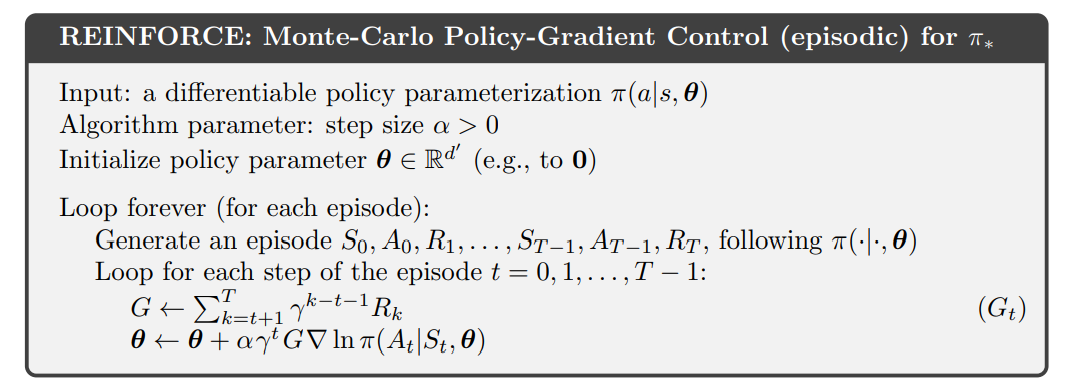

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import copy

NUM_EPISODES = 4000
LEARNING_RATE = 0.000025
GAMMA = 0.99


In [2]:
# noinspection PyMethodMayBeStatic
class Agent:
    def __init__(self):
        self.poly = PolynomialFeatures(1)
        self.w = np.random.rand(5, 2) * 0.01

    def policy(self, state):
        z = state.dot(self.w)
        exp = np.exp(z)
        return exp/np.sum(exp)

    def __softmax_grad(self, softmax):
        s = softmax.reshape(-1,1)
        return np.diagflat(s) - np.dot(s, s.T)

    def grad(self, probs, action, state):
        dsoftmax = self.__softmax_grad(probs)[action,:]
        dlog = dsoftmax / probs[0,action]
        grad = state.T.dot(dlog[None,:])
        return grad

    def update_with(self, grads, rewards):

        for i in range(len(grads)):
            # Loop through everything that happend in the episode
            # and update towards the log policy gradient times **FUTURE** reward

            total_grad_effect = 0
            for t, r in enumerate(rewards[i:]):
                total_grad_effect += r * (GAMMA ** r)
            self.w += LEARNING_RATE * grads[i] * total_grad_effect
            #print("Grads update: " + str(np.sum(grads[i])))

In [3]:
def main(agent, train = 1):
    env = gym.make('CartPole-v0')
    np.random.seed(1)

    
    complete_scores = []

    for e in range(NUM_EPISODES):
        state = env.reset()[None, :]
        state = agent.poly.fit_transform(state)

        rewards = []
        grads = []
        score = 0

        while True:

            probs = agent.policy(state)
            action_space = env.action_space.n
            
            if train:
                action = np.random.choice(action_space, p=probs[0])
                

                next_state, reward, done,_ = env.step(action)
                next_state = next_state[None,:]
                next_state = agent.poly.fit_transform(next_state.reshape(1, 4))
                grad = agent.grad(probs, action, state)

                grads.append(grad)
                rewards.append(reward)
                
            else:
                action = np.argmax(probs[0])
                next_state, reward, done,_ = env.step(action)
                next_state = next_state[None,:]
                next_state = agent.poly.fit_transform(next_state.reshape(1, 4))

            score += reward
            state = next_state

            if done:
                break
                
        if train:
            agent.update_with(grads, rewards)
            
        complete_scores.append(score)

    env.close()
    plt.plot(np.arange(NUM_EPISODES),
             complete_scores)
    
    return agent


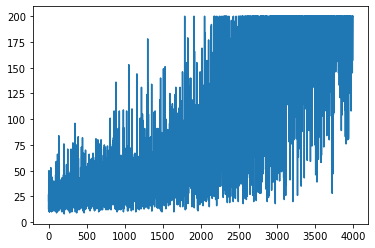

In [4]:
agent = Agent()

trained_agent = main(agent, 1)

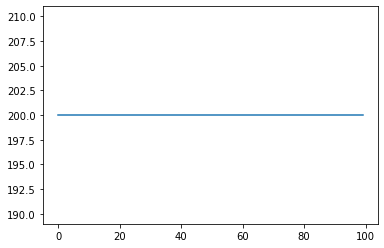

In [5]:
NUM_EPISODES = 100

trained_agent = main(trained_agent, 0)

In [6]:
#sigmoid agent

NUM_EPISODES = 5000
LEARNING_RATE = 0.0001
GAMMA = 0.99

# noinspection PyMethodMayBeStatic
class Agent_S:
    def __init__(self):
        self.poly = PolynomialFeatures(1)
        self.w = np.random.randn(5, 1) * 0.01

    # Our policy that maps state to action parameterized by w
    # noinspection PyShadowingNames
    def policy(self, state):
        z = np.sum(state.dot(self.w))
        return self.sigmoid(z)

    def sigmoid(self, x):
        s = 1 / (1 + np.exp(-x))
        return s

    def sigmoid_grad(self, sig_x):
        return sig_x * (1 - sig_x)

    def grad(self, probs, action, state):
        grad = state.T.dot(probs - action)
        return -grad

    def update_with(self, grads, rewards):
        if len(grads) < 50:
            return
        for i in range(len(grads)):
            # Loop through everything that happened in the episode
            # and update towards the log policy gradient times **FUTURE** reward

            total_grad_effect = 0
            for t, r in enumerate(rewards[i:]):
                total_grad_effect += r * (GAMMA ** r)
            self.w += LEARNING_RATE * grads[i] * total_grad_effect

In [7]:
def main_s(agent, train = 1):
    env = gym.make('CartPole-v0')
    np.random.seed(1)

    complete_scores = []

    for e in range(NUM_EPISODES):
        state = env.reset()[None, :]
        state = agent.poly.fit_transform(state)

        rewards = []
        grads = []
        score = 0

        while True:
            
            probs = agent.policy(state)
            action_space = env.action_space.n
            
            if train:
                
                action = np.random.choice(action_space, p=[1 - probs, probs])

                next_state, reward, done, _ = env.step(action)
                next_state = next_state[None, :]
                next_state = agent.poly.fit_transform(next_state.reshape(1, 4))
                
                grad = agent.grad(probs, action, state)
                grads.append(grad)
                rewards.append(reward)
                
            else:
                action = np.argmax([1 - probs, probs])
                next_state, reward, done, _ = env.step(action)
                next_state = next_state[None, :]
                next_state = agent.poly.fit_transform(next_state.reshape(1, 4))

            score += reward
            state = next_state

            if done:
                break
                
        if train:
            agent.update_with(grads, rewards)
            
        complete_scores.append(score)


    env.close()
    plt.plot(np.arange(NUM_EPISODES),
             complete_scores)
    plt.savefig('image1.png')
    
    return agent

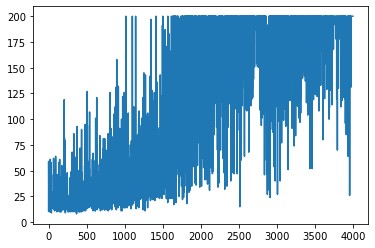

In [8]:
NUM_EPISODES = 4000

agent_s = Agent_S()

trained_agent_s = main_s(agent_s, 1)

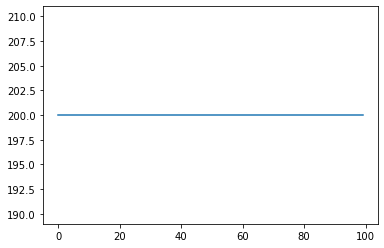

In [9]:
NUM_EPISODES = 100

trained_agent_s= main_s(trained_agent_s, 0)